# Lab-3 Template

Answer questions in the designated cells

## Preparation

Use dataset that is provided in the eLearning

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1500)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
"""
Created on Mon Mar 18 18:25:50 2019

@author: Uri Smashnov

Purpose: Analyze input Pandas DataFrame and return stats per column
Details: The function calculates levels for categorical variables and allows to analyze summarized information

To view wide table set following Pandas options:
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',200)
"""
import pandas as pd
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

### Load data

In [3]:
#train_df = pd.read_csv('./data/SBA_loans_small.zip')
X_train = pd.read_csv('./data/SBA_loans_train.csv')
X_test  = pd.read_csv('./data/SBA_loans_test.csv')
orig_columns = list(X_train.columns)

In [4]:
print(orig_columns)

['City', 'State', 'Zip', 'Bank', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'Defaulted']


In [5]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (337186, 20)
Test shape: (112396, 20)


**Review dataset**

In [6]:
desc_df = describe_more(X_train)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,City,22069,object,1,30,"{'LOS ANGELES': 4278, 'HOUSTON': 3801, 'NEW YO..."
1,State,51,object,2,3,"{'CA': 49031, 'TX': 26500, 'NY': 21508, 'FL': ..."
2,Zip,26044,int64,1,5,"{90015: 344, 10001: 328, 93401: 308, 33166: 26..."
3,Bank,4833,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 32382, 'WELLS F..."
4,BankState,55,object,2,3,"{'CA': 44497, 'NC': 29717, 'IL': 24674, 'OH': ..."
5,NAICS,1279,int64,1,6,"{0: 75763, 722110: 10456, 722211: 7319, 811111..."
6,Term,372,int64,1,3,"{84: 86087, 60: 33770, 240: 32245, 120: 29056,..."
7,NoEmp,433,int64,1,4,"{1: 57553, 2: 51865, 3: 34228, 4: 27633, 5: 22..."
8,NewExist,3,float64,3,3,"{1.0: 241894, 2.0: 94857, 0.0: 389}"
9,CreateJob,180,int64,1,4,"{0: 236015, 1: 23537, 2: 21779, 3: 10849, 4: 7..."


In [7]:
X_train.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
count,337186.000000,337186.000000,337186.000000,337186.000000,337140.000000,337186.000000,337186.000000,337186.000000,337186.000000,3.371860e+05,337186.000000,3.371860e+05,3.371860e+05,337186.000000
mean,53839.723945,398565.095974,110.888984,11.310229,1.280204,8.590790,10.977176,2754.662685,0.758050,2.021301e+05,5.643016,1.935411e+05,1.501295e+05,0.175191
std,31173.277974,263305.463724,78.951681,68.753263,0.451661,239.591219,240.184246,12749.672453,0.646786,2.892966e+05,2232.801967,2.847135e+05,2.293072e+05,0.380131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000e+02,1.000000e+02,0.000000
25%,27604.250000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,4.201250e+04,0.000000,3.500000e+04,2.125000e+04,0.000000
50%,55414.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+05,0.000000,9.000000e+04,6.210000e+04,0.000000
75%,83706.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.400000e+05,0.000000,2.270000e+05,1.750000e+05,0.000000
max,99999.000000,928120.000000,505.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000,1.100000e+07,996262.000000,5.000000e+06,4.869000e+06,1.000000


In [8]:
X_train.head()

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,Defaulted
0,Huntsville,AL,35811,"BUSINESS LOAN CENTER, LLC",FL,621310,73,1,2.0,2,1,0,1,N,N,25000.0,0.0,25000.0,21250.0,1
1,SCOTTSDALE,AZ,85254,WELLS FARGO BANK NATL ASSOC,CA,0,84,3,2.0,0,0,0,0,N,N,52000.0,0.0,52000.0,46800.0,1
2,BANGOR,ME,4401,BANGOR SAVINGS BANK,ME,323110,84,9,1.0,0,0,1,1,0,Y,150000.0,0.0,150000.0,127500.0,0
3,AVONDALE,AZ,85323,NATIONAL BANK OF ARIZONA,AZ,722110,27,20,1.0,0,20,10625,2,Y,N,186959.0,0.0,100000.0,50000.0,1
4,HAMMOND,LA,70403,"BIZCAPITAL BIDCO II, LLC",LA,0,60,1,1.0,0,0,1,1,0,Y,50000.0,0.0,50000.0,40000.0,0


Explore levels and counts in the `RevLineCr` column. As we can see, some column values needs to be "cleaned"

In [9]:
desc_df.iloc[13]["Level_Values"]

{'N': 157494,
 '0': 96923,
 'Y': 75248,
 'T': 5797,
 'R': 7,
 '1': 6,
 '`': 2,
 '2': 1,
 ',': 1,
 '7': 1,
 'A': 1,
 '-': 1,
 'Q': 1}

# Question 1 - point

Replace missing values for all columns for both X_train and X_test.
Replace Na's with zero for numerical variables and with "Missing" for categorical

In [10]:
#Solution
values_to_fill = {}
for col in X_train.drop(columns=['Defaulted']).columns:
    if X_train[col].dtype == 'object':
        values_to_fill[col] = "Missing"
    else:
        values_to_fill[col] = 0

X_train.fillna(value=values_to_fill,inplace=True)
X_test.fillna(value=values_to_fill, inplace=True)

## Question 2 - 5 point 
**Change on 2/4/2023 - Remove 20 values limitation from Lablel encoder.**

The question is asking to encode categorical variables. Because we are going to use Decision Tree apraoch in the Lab, we will not use One-Hot encoding. Instead, you are asked to Label encoding, Target encoding and Weight of Evidence encoding.
You will need to install `category_encoders` into your virtual environment by running below command after you have activated the environment:  
`!pip install category_encoders==2.6.0`  
  
In the next question you will be asked to try both approaches, and see which one performs better.

Consider following variables to be Categorical:
- "City"  has  22070  values
- "State"  has  52  values
- "Bank"  has  4834  values
- "BankState"  has  56  values
- "RevLineCr"  has  14  values
- "LowDoc"  has  8  values

For the categorical variables listed above, use three type of categorical variables encoders:  
- Use LabelEncoder to encode 
- Use Target encoding from here: https://contrib.scikit-learn.org/category_encoders/targetencoder.html 
- Use WOE encoder from here: https://contrib.scikit-learn.org/category_encoders/woe.html 

Take following steps with encoders:
   - Target and WOE:
        - Define encoder
        - Fit encoder on training data only
        - Transform Train/test datasets separately
   - Label Encoder:
        - Fit Label encoder on combination of train/test data or modify logic of Label encoder to handle unseen valid values
        - If you decide to fit the encoder on Training data only, make sure you have treatment for unseen values: values that present in Test dataset but not in Train dataset
        - Transform Train/test datasets separately

For each encoder, give new columns names "Original-name"_le (for Label encoder), "Original-name"_te for target-encoder and "Original-name"_woe for WOE encoder. After encoding, your train/test dataframes will have all the original columns, plus new columns with encoded values.

In [11]:
len_data = len(X_train)
for col in X_train.drop(columns=['Defaulted']).columns:
  if X_train[col].dtype == 'object':
    print("Column ",col," has ",X_train[col].nunique()," values")

Column  City  has  22070  values
Column  State  has  52  values
Column  Bank  has  4834  values
Column  BankState  has  56  values
Column  RevLineCr  has  14  values
Column  LowDoc  has  8  values


In [12]:
# Solution
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from copy import deepcopy

'''Save original columns that need to be droped or not used
'''
orig_categorical_columns = []
cat_encoders = {}
le_columns = []

for col in X_train.drop(columns=['Defaulted']).columns:
  if X_train[col].dtype == 'object':
    print("Encode column:...", col)
    enc = LabelEncoder()
    enc.fit(list(X_train[col])+list(X_test[col]))
    X_train[col+"_le"] = enc.transform(X_train[[col]])
    X_test[col+"_le"] = enc.transform(X_test[[col]])
    cat_encoders[(col,"le")] = [deepcopy(enc),"le"]
    orig_categorical_columns.append(col)
    le_columns.append(col+"_le")

Encode column:... City
Encode column:... State
Encode column:... Bank
Encode column:... BankState
Encode column:... RevLineCr
Encode column:... LowDoc


In [13]:
label_col = 'Defaulted'
# Target encoding
target_encoder = ce.TargetEncoder(cols=orig_categorical_columns, min_samples_leaf=20, smoothing=10)
target_encoder.fit(X_train[orig_categorical_columns],X_train[label_col])
X_train_target_enc = target_encoder.transform(X_train[orig_categorical_columns])
X_test_target_enc = target_encoder.transform(X_test[orig_categorical_columns])

# WOE encoding
woe_encoder = ce.WOEEncoder(cols=orig_categorical_columns)
woe_encoder.fit(X_train[orig_categorical_columns],X_train[label_col])
X_train_woe_enc = woe_encoder.transform(X_train[orig_categorical_columns])
X_test_woe_enc = woe_encoder.transform(X_test[orig_categorical_columns])


te_columns = []
woe_columns = []
for col in orig_categorical_columns:
    X_train[col+"_te"] = X_train_target_enc[col]
    X_test[col+"_te"] = X_test_target_enc[col]
    te_columns.append(col+"_te")
    
    X_train[col+"_woe"] = X_train_woe_enc[col]
    X_test[col+"_woe"] = X_test_woe_enc[col]
    woe_columns.append(col+"_woe")

cat_encoders[("orig_categorical_columns","te")] = [deepcopy(target_encoder),"te"]
cat_encoders[("orig_categorical_columns","woe")] = [deepcopy(woe_encoder),"woe"]

In [14]:
cat_encoders

{('City', 'le'): [LabelEncoder(), 'le'],
 ('State', 'le'): [LabelEncoder(), 'le'],
 ('Bank', 'le'): [LabelEncoder(), 'le'],
 ('BankState', 'le'): [LabelEncoder(), 'le'],
 ('RevLineCr', 'le'): [LabelEncoder(), 'le'],
 ('LowDoc', 'le'): [LabelEncoder(), 'le'],
 ('orig_categorical_columns',
  'te'): [TargetEncoder(cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr',
                      'LowDoc']), 'te'],
 ('orig_categorical_columns',
  'woe'): [WOEEncoder(cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc']), 'woe']}

## Question 3 - 5 points (small wording change on 2/4/2023)

Train decision tree models as below:
```
max_depth = 10

dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth)

```
Train one model for every type of categorical encoding: Label, Target and WOE

Report F1, and confusion matrix for each of the 3 models.  
Use F1 score "weighted" : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html 

In [30]:
# Solution

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

non_categorical_columns = [col for col in orig_columns if col not in orig_categorical_columns]
non_categorical_columns.remove(label_col)

max_depth = 10

# LE Encoding
dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth)

dtc.fit(X_train[non_categorical_columns+le_columns], X_train[label_col])

y_tst_pred = dtc.predict(X_test[non_categorical_columns+le_columns])
y_tr_pred = dtc.predict(X_train[non_categorical_columns+le_columns])
print("Trained Decision Tree with LE Encoding",)
f1 = f1_score(X_test[label_col], y_tst_pred, average='weighted')
print("Test F1 score:...",f1)
print("====Confusion Matrix===")
print(confusion_matrix(X_test[label_col], y_tst_pred))
print("\n")


# TE encoding
dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth)

dtc.fit(X_train[non_categorical_columns+te_columns], X_train[label_col])

y_tst_pred = dtc.predict(X_test[non_categorical_columns+te_columns])
y_tr_pred = dtc.predict(X_train[non_categorical_columns+te_columns])
print("Trained Decision Tree with TE Encoding",)
f1 = f1_score(X_test[label_col], y_tst_pred, average='weighted')
print("Test F1 score:...",f1)
print("====Confusion Matrix===")
print(confusion_matrix(X_test[label_col], y_tst_pred))
print("\n")

# WOE encoding
dtc = DecisionTreeClassifier(random_state=0, 
                             criterion="entropy",
                             max_depth=max_depth)

dtc.fit(X_train[non_categorical_columns+woe_columns], X_train[label_col])

y_tst_pred = dtc.predict(X_test[non_categorical_columns+woe_columns])
y_tr_pred = dtc.predict(X_train[non_categorical_columns+woe_columns])
print("Trained Decision Tree with WOE Encoding",)
f1 = f1_score(X_test[label_col], y_tst_pred, average='weighted')
print("Test F1 score:...",f1)
print("====Confusion Matrix===")
print(confusion_matrix(X_test[label_col], y_tst_pred))
print("\n")

Trained Decision Tree with LE Encoding
Test F1 score:... 0.927703985243013
====Confusion Matrix===
[[88836  3853]
 [ 4241 15466]]


Trained Decision Tree with TE Encoding
Test F1 score:... 0.9280157378017886
====Confusion Matrix===
[[89095  3594]
 [ 4428 15279]]


Trained Decision Tree with WOE Encoding
Test F1 score:... 0.9247565682735117
====Confusion Matrix===
[[89584  3105]
 [ 5169 14538]]




## Question 4 - 5 points

To answer this question use categorical columns encoded with Target encoder.

Tune Decision Tree model to achieve best performance as measured by F1 score ("weighted").

Here is Hyper parameter space:  
   - max_depth = [5,10,12,15,20]  
   - min_samples_split = [25, 50, 75]  
   - min_impurity_decrease = [0.0, 0.02, 0.05]  
    
You should train 5x3x3 = 45 models

Report best model parameters as measured by F1.  
Report best model F1 and confusion matrix.

In [35]:
# Solution 
from sklearn.tree import DecisionTreeClassifier

best_f1 = 0
best_params = {}
best_model = None
X_tr = X_train[non_categorical_columns+te_columns]
Y_tr = X_train[label_col]
X_tst = X_test[non_categorical_columns+te_columns]
Y_tst = X_test[label_col]
for max_depth in [5,10,12,15,20]:
    for min_samples_split in [25, 50, 75]:
        for min_impurity_decrease in [0.0, 0.02, 0.05]:
            dtc = DecisionTreeClassifier(random_state=0, 
                                         criterion="entropy",
                                         max_depth=max_depth,
                                         min_samples_split=min_samples_split,
                                         min_impurity_decrease=min_impurity_decrease)

            dtc.fit(X_tr, Y_tr)
            y_tst_pred = dtc.predict(X_tst)
            y_tr_pred = dtc.predict(X_tr)
            print("Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):(", \
                                max_depth, min_samples_split,min_impurity_decrease,")")
            #print("F1 for Train:", f1_score(Y_tr, y_tr_pred, average='weighted'))
            f1 = f1_score(Y_tst, y_tst_pred, average='weighted')
            if f1>best_f1:
                best_f1 = f1
                best_params["max_depth"] = max_depth
                best_params["min_samples_split"] = min_samples_split
                best_params["min_impurity_decrease"] = min_impurity_decrease
            print("F1 for Test:", f1)
            #print("Test set confusion matrix:")
            #print(confusion_matrix(y_true, y_pred))

'''Re-train model with best params'''
print("Best params:", best_params)
best_model = DecisionTreeClassifier(random_state=0, 
                                     criterion="entropy",
                                     max_depth=best_params["max_depth"],
                                     min_samples_split=best_params["min_samples_split"],
                                     min_impurity_decrease=best_params["min_impurity_decrease"])
best_model.fit(X_tr, Y_tr)
y_tst_pred = best_model.predict(X_tst)
y_tr_pred = best_model.predict(X_tr)
print("Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):(", \
      best_params["max_depth"], best_params["min_samples_split"],
      best_params["min_impurity_decrease"],")")
print("F1 for Train:", f1_score(Y_tr, y_tr_pred, average='weighted'))
f1 = f1_score(Y_tst, y_tst_pred, average='weighted')
print("F1 for Test:", f1)
print("Test set confusion matrix:")
print(confusion_matrix(Y_tst, y_tst_pred))

Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 25 0.0 )
F1 for Test: 0.8953643970887671
Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 25 0.02 )
F1 for Test: 0.8514579259765372
Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 25 0.05 )
F1 for Test: 0.8514579259765372
Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 50 0.0 )
F1 for Test: 0.8953643970887671
Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 50 0.02 )
F1 for Test: 0.8514579259765372
Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 50 0.05 )
F1 for Test: 0.8514579259765372
Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 75 0.0 )
F1 for Test: 0.8953643970887671
Trained Decision Tree with (max_dept, min_samples_split, min_impurity_decrease):( 5 75 0.02 )
F1 for Test: 0.851457925976

## Question 5 - 4 Points

Produce viszualization of the best model feature importances.
Calculate feature importance using permutation method.

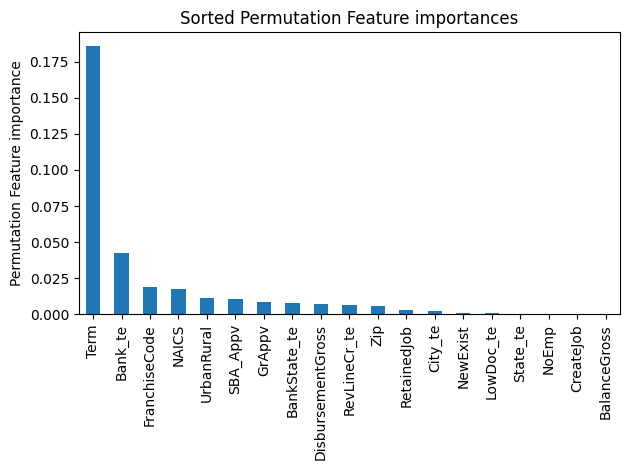

In [39]:
#Solution
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

%matplotlib inline
result = permutation_importance(
    best_model, X_tst, Y_tst, n_repeats=100, random_state=42, n_jobs=4
)

feature_names = X_tst.columns
tree_importances = pd.Series(result.importances_mean, index=feature_names)
tree_importances = tree_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Sorted Permutation Feature importances")
ax.set_ylabel("Permutation Feature importance")
fig.tight_layout()